In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from matplotlib.collections import LineCollection
from pathlib import Path
from scipy import spatial
from tqdm import tqdm


from good_robot.gram import layer_to_lines, lines_to_layer, Turtle
from good_robot import write
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:


def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

def transform(x, y):
    x_out = 1 - x - np.sin(y**2)
    y_out = 1 + y - np.cos(x**2)
    return x_out, y_out

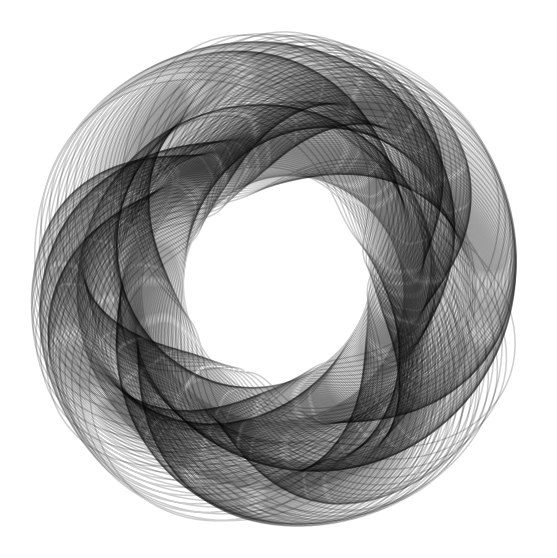

In [ ]:

yfreqs = np.linspace(1,4,100)
for i, yfreq in enumerate(yfreqs):
    lines = []
    plt.close('all')
    ys = np.arange(-np.pi*2, np.pi*2,.01)
    for x in np.arange(-0.8, 0.7, 0.03):
        X,Y = transform(np.ones(ys.shape)*x, ys)
        X,Y = pol2cart((X * 0.15 + 0.4), (Y * yfreq))
    #     X += np.linspace(0, 5, len(X))
        lines.append(np.stack([X.copy(), Y.copy()]).T)
    f,ax = plt.subplots(figsize=(10,10))
    lc = LineCollection(lines, color='k', alpha=0.2)
    ax.add_collection(lc)
    ax.axis('tight')
    ax.axis('square')
    ax.axis('off')
    f.savefig(f'/mnt/c/data/side/sinflowers/sinflower{i}.png')

(-0.8465481387471978,
 0.7927389711583739,
 -0.8012138545620764,
 0.8380732553434953)

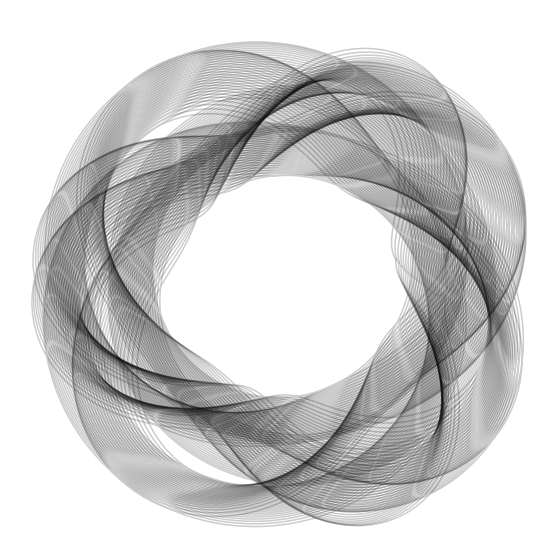

In [ ]:
lines = []
plt.close('all')
ys = np.arange(-np.pi*2, np.pi*2+0.01,.01)
for x in np.arange(-0.5, 0.5, 0.04):
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4), (Y * 4 + x*0.3))
    lines.append(np.stack([X.copy(), Y.copy()]).T)
f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(lines, color='k', alpha=0.2)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
ax.axis('off')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0051_sinflower.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=[lines_to_layer(lines)], filename=save_filepath, margin=0.2)

In [ ]:
def transform(x, y):
    x_out = 1 - x - np.sin(1 *y**2)
    y_out = 1 + y - np.cos(x**2)
    return x_out, y_out

(-0.9869391313383745,
 0.9869391313383747,
 -0.7081044500903554,
 1.265773812586394)

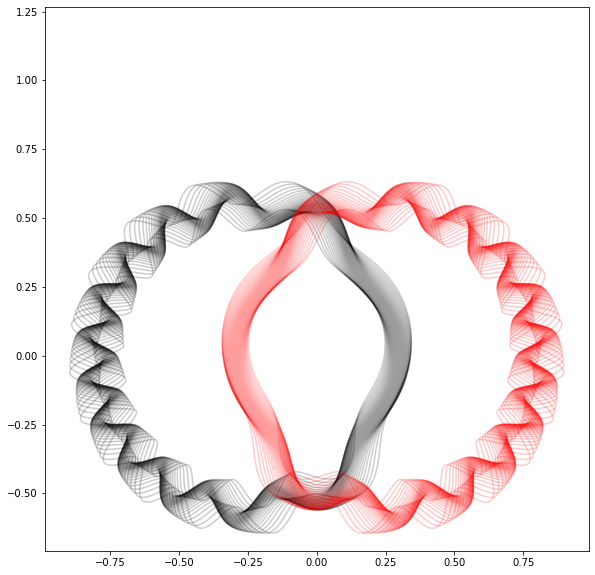

In [ ]:
lines = []
ys = np.arange(-np.pi*2, np.pi*2,.01)
xstart = -1
xend = 1
for x in np.arange(xstart, xend, 0.05):
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((0.05*X)**1 + 0.5, Y*0.5)
#     X += np.linspace(0, 5, len(X))
#     Y += np.linspace(0, 5, len(Y))
#     Y *= X
    X += -0.25
#     Y += 1
#     X *= Y
    lines.append(np.stack([X.copy(), Y.copy()]).T)

lines2 = []
ys = np.arange(-np.pi*2, np.pi*2,.01)
xstart = -1
xend = 1
for x in np.arange(xstart, xend, 0.05):
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((0.05*X)**1 + 0.5, Y*0.5)
    X += -0.25
    X *= -1
    lines2.append(np.stack([X.copy(), Y.copy()]).T)
    
f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(lines, color='k', alpha=0.2)
ax.add_collection(lc)
lc2 = LineCollection(lines2, color='r', alpha=0.2)
ax.add_collection(lc2)
ax.axis('tight')
ax.axis('square')

In [ ]:
plt.close('all')

(-0.846556829040403,
 0.792921467315726,
 -0.8012336515334602,
 0.8382446448226688)

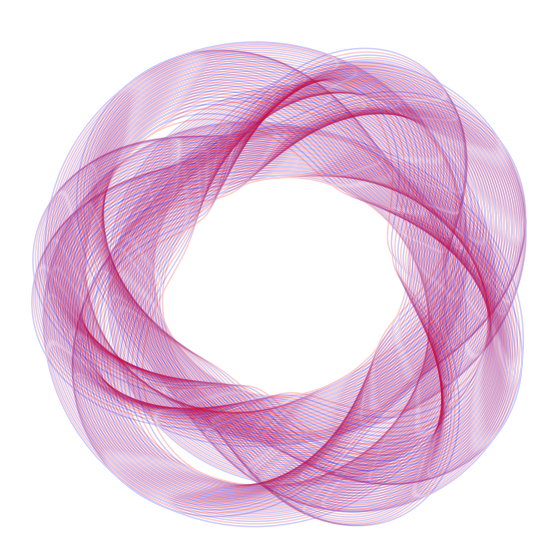

In [ ]:
lines = []
plt.close('all')
ys = np.arange(-np.pi*2, np.pi*2+.003,.003)
xs = np.arange(-0.5, 0.5, 0.08)
for x in xs:
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4), (Y * 4 + x*0.3))
    lines.append(np.stack([X.copy(), Y.copy()]).T)
    
lines2 = []
ys = np.arange(-np.pi*2, np.pi*2+.003,.003)
for x in xs+0.04:
    X,Y = transform(np.ones(ys.shape)*x, ys)
    X,Y = pol2cart((X * 0.15 + 0.4), (Y * 4 + x*0.3))
    lines2.append(np.stack([X.copy(), Y.copy()]).T)   
    

f,ax = plt.subplots(figsize=(10,10))
lc = LineCollection(lines, color='b', alpha=0.2)
ax.add_collection(lc)
lc2 = LineCollection(lines2, color='r', alpha=0.2)
ax.add_collection(lc2)
ax.axis('tight')
ax.axis('square')
ax.axis('off')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0053_sinflower.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=[lines_to_layer(lines), lines_to_layer(lines2)], filename=save_filepath, margin=0.2)

## need to figure out a way not to put so many lines in the same spot on paper, ink is causing it to buckle